# EE 519 — Speech AI 
## HW-1 | Notebook 2: Signal Operations & System Properties (Linearity + Time Invariance)

**Student Name:**  
**USC ID:**  
**Date:**  

---

### Learning Objectives
By completing this notebook, you will:
- Apply common **signal operations** (addition, scaling, multiplication) to speech
- Understand which operations are physically meaningful and which are not
- Test whether a system is **linear** and/or **time-invariant**
- Build intuition using **plots + listening tests + reasoning**

> ⚠️ **Important**
> - All answers (code + explanations) must be written **inside this notebook**
> - Do **not** delete questions or prompts
> - Clearly label all plots (title, axes, units)
> - Audio must be playable inline where requested


### Grading (Notebook 2 — 20 points)

| Component | Points |
|---|---:|
| Correct loading/handling of signals | 3 |
| Signal operations (addition/scaling/multiplication) + plots | 6 |
| Linearity tests (additivity + homogeneity) | 5 |
| Time invariance tests (delay-in / delay-out logic) | 4 |
| Clarity, organization, and clean reporting | 2 |

> We grade **understanding and reasoning**, not perfection.


---

# 0. Setup

This notebook must run **quickly and reproducibly** for grading.

## ✅ Reproducibility requirements (very important)
- Put all audio files in the **same folder as this notebook**, or inside `./audio/`.
- Use **relative paths only** (no absolute paths like `/Users/...` or `C:\...`).
- Do **not** rely on cloud-mounted paths (Google Drive mounts, etc.).
- Your notebook must run from top to bottom after we download your submission ZIP.

Recommended folder structure:
```
HW1/
├── HW1_Notebook2_Signal_Operations_and_System_Properties.ipynb
├── audio/
│   ├── x1.wav
│   └── x2.wav
└── (optional) utils.py
```

## Data requirements
You need **at least two** speech recordings:
- `x1`: your sentence (or a short phrase)
- `x2`: another recording (could be another sentence, another speaker, or a vowel/fricative)

### You have two options (choose one):
**Option A — Record inside Python (recommended if supported):**
- Record `x1` and `x2` directly in this notebook and save as WAV into `./audio/`

**Option B — Record externally and load:**
- Record using phone / laptop app, export as WAV, then place files in `./audio/`
- Keep filenames simple (no spaces)

Suggested filenames:
- `./audio/x1.wav`
- `./audio/x2.wav`

> If the two signals have different sampling rates or lengths, you must handle this properly and document what you did.


In [2]:
# TODO: Load required libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Optional: scipy for resampling
# from scipy.signal import resample_poly


In [3]:
# TODO: Choose ONE of the two options below.

# =========================
# Option A (Optional): Record inside this notebook
# =========================
# If your environment supports recording, you may record and save WAV files to ./audio.
# After recording, set X1_PATH and X2_PATH to the saved files below.

# =========================
# Option B (Default): Load existing WAV files
# =========================
# Put your files here (recommended):
#   ./audio/x1.wav
#   ./audio/x2.wav

X1_PATH = "./audio/x1.wav"
X2_PATH = "./audio/x2.wav"


### Optional: Recording inside the notebook (if supported)

If you want to record directly in Python, you may use one of these approaches:
- **JupyterLab/Notebook with `sounddevice`** (works on some machines)
- **Google Colab** (requires special widgets; not guaranteed)
- Or record externally (Option B), which is always acceptable

> If recording inside Python does not work on your system, **use Option B**.


In [6]:
# OPTIONAL (only if supported on your system):
# Record audio inside Python and save to ./audio
#
# If this doesn't work, skip it and use Option B (load external WAV files).

#!pip install sounddevice soundfile  # (uncomment if needed and allowed)
# import sounddevice as sd
# import soundfile as sf
# from pathlib import Path

# Path("./audio").mkdir(exist_ok=True)

# fs_rec = 16000
# duration_sec = 4

# print("Recording x1... Speak your sentence now.")
# x1 = sd.rec(int(duration_sec*fs_rec), samplerate=fs_rec, channels=1)
# sd.wait()
# x1 = x1.squeeze()
# sf.write("./audio/x1.wav", x1, fs_rec)

# print("Recording x2... Record a different utterance now.")
# x2 = sd.rec(int(duration_sec*fs_rec), samplerate=fs_rec, channels=1)
# sd.wait()
# x2 = x2.squeeze()
# sf.write("./audio/x2.wav", x2, fs_rec)

#After recording, keep:
X1_PATH = "./audio/x1.wav"
X2_PATH = "./audio/x2.wav"


Recording x1... Speak your sentence now.
Recording x2... Record a different utterance now.


In [7]:
# TODO: Implement or reuse your WAV loader from Notebook 1
def load_wav(path):
    """Return signal, fs."""
    x, fs = sf.read(path, dtype="float32", always_2d=True)
    if x.shape[1] > 1:
        x = np.mean(x, axis=1)
    else:
        x = x[:,0]
    x = np.clip(x, -1, 1)
    return x, fs


In [8]:
# TODO: Load both signals
x1, fs1 = load_wav(X1_PATH)
x2, fs2 = load_wav(X2_PATH)

# Print:
# - fs, duration, min/max for each
print("Sampling rate (x1):", fs1)
print("Sampling rate (x2):", fs2)

print("x1 duration (seconds):", len(x1) / fs1)
print("x2 duration (seconds):", len(x2) / fs2)

print("x1 min amplitude:", np.min(x1))
print("x2 max amplitude:", np.max(x2))

Sampling rate (x1): 16000
Sampling rate (x2): 16000
x1 duration (seconds): 4.0
x2 duration (seconds): 4.0
x1 min amplitude: -0.029174805
x2 max amplitude: 0.03552246


In [17]:
# TODO: Utility helpers (plotting and playback)
def plot_waveform(x, fs, title, tlim=None, x_label = "Time (s)", y_label = "Amplitude"):
    t = np.arange(len(x)) / fs
    plt.figure()
    plt.plot(t, x)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def play_audio(x, fs):
    display(Audio(x, rate=fs))


---

# 1. Preprocessing for Fair Operations

Many operations (addition, multiplication) require:
- Same sampling rate
- Comparable signal lengths
- Proper alignment (optional but recommended)

### Task
Create `x1p` and `x2p` such that:
1. Both have the **same sampling rate** (choose one and explain)
2. Both have the **same length** (truncate or pad, but document)
3. Optional: Align signals (e.g., trim leading silence)

> You must clearly explain your design choices below.


In [42]:
# TODO: Choose a common sampling rate
# Option A: use fs1
# Option B: use fs2
# Option C: choose a new rate (e.g., 16000) and resample both

fs_common = 8000


In [43]:
# TODO: Implement resampling if needed
from scipy.io import wavfile
from scipy.signal import resample_poly

def resample_signal(x, fs_in, fs_out):
    x_out = resample_poly(x, fs_out, fs_in)
    return x_out, fs_out


In [44]:
# TODO: Create preprocessed signals with same fs and same length
x1p = resample_signal(x1, fs1, fs_common)[0]
x2p = resample_signal(x2, fs2, fs_common)[0]
fs = fs_common


### Explain your preprocessing

- What sampling rate did you choose and why?
- How did you handle length mismatch?
- Did you align signals? If yes, how?


Student Answer:

- I chose the sampling rate to be 8000 because it is 16000 originally and I still want to catch good patterns and hear good audio. 
- There was no length mismatch they were both 4 seconds.
- I did not align signals. 


---

# 2. Signal Operations (Time + Frequency + Listening)

In this section, you will perform:
- Addition
- Amplitude scaling
- Multiplication

For each operation:
1. Plot waveform (full + zoom)
2. Plot magnitude spectrum (optional but strongly recommended)
3. Play audio (when meaningful)
4. Describe what you observe


In [45]:
# TODO: Implement a magnitude spectrum helper
from scipy.signal import get_window
from scipy.fft import rfft, rfftfreq

def magnitude_spectrum(x, fs):
    
    ### First step is to extract a segment of the signal from X for analysis 
    start_sec = 0 
    duraction_sec = 4
    io = int(start_sec * fs)
    N = int(duraction_sec * fs)
    segment = x[io:io+N]
    
    ### Second step is to apply a window befor FFT to reduce spectral leakage. I choose Hanning window here.
    window = get_window("hann", N)
    segment_windowed = segment * window
    
    ### Third step is to compute the magnitude spectrum ussing FFT.
    X = rfft(segment_windowed)
    magnitude = np.abs(X)
    
    ### fourth is to compute the corresponding frequency axis 
    freqs = rfftfreq(N, 1/fs)

    """Return frequency axis (Hz) and magnitude spectrum (linear or dB)."""
    return freqs, magnitude


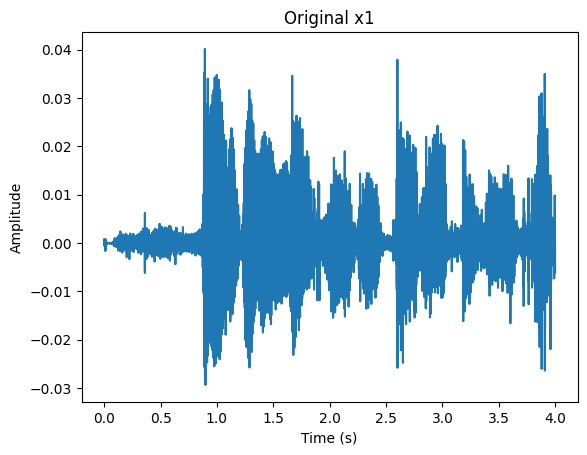

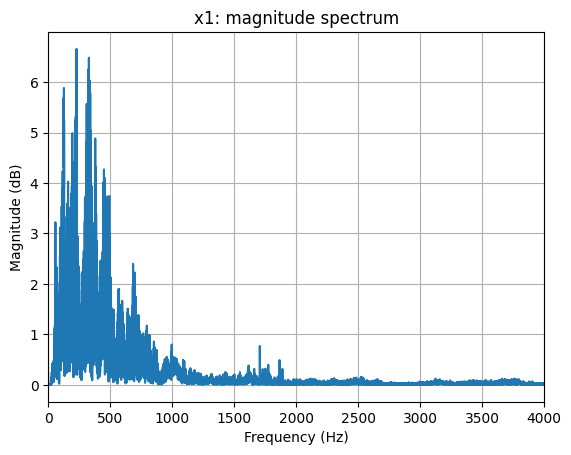

8000


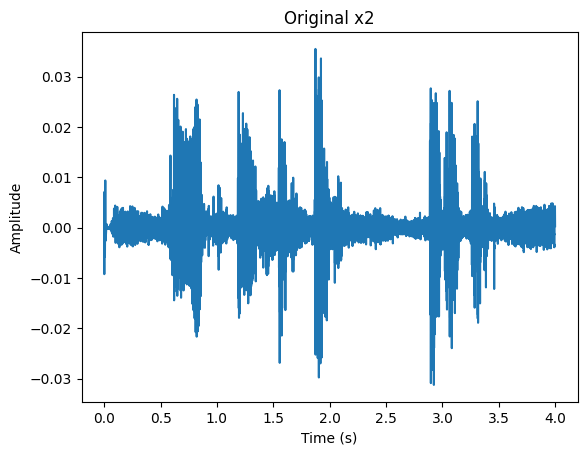

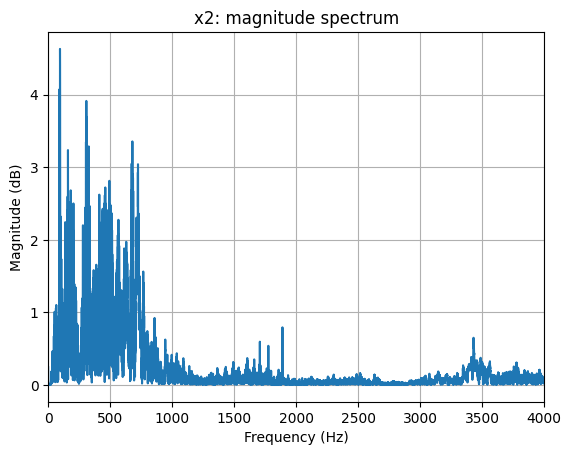

8000


In [46]:
for key, (x,fs) in [("x1", (x1p, fs)), ("x2", (x2p, fs))]:
    plot_waveform(x, fs, title=f"Original {key}")
    f, mag = magnitude_spectrum(x, fs)
    plt.figure()
    plt.plot(f, mag)
    plt.title(f"{key}: magnitude spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)" or "Magnitude")
    plt.xlim(0, fs/2)
    plt.grid(True)
    plt.show()
    print(fs)
    play_audio(x, fs)

## 2.1 Addition: x1 + x2

### Tasks
- Compute `y_add = x1p + x2p`
- Prevent clipping if needed (document your method)
- Compare `y_add` to originals

> Question: Is adding two speech signals physically meaningful? In what scenario might it be? (hint: mixing)


In [49]:
# TODO: Addition
y_add = .5 * x1p + .5* x2p
# If clipping occurs, apply a documented strategy:
# - normalize
# - scale by 0.5
# - limiter (not required)


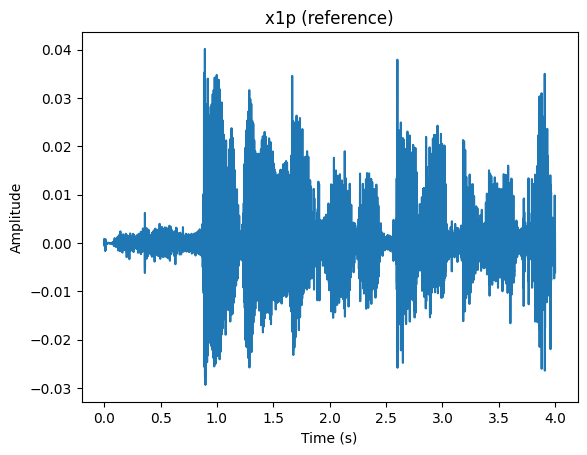

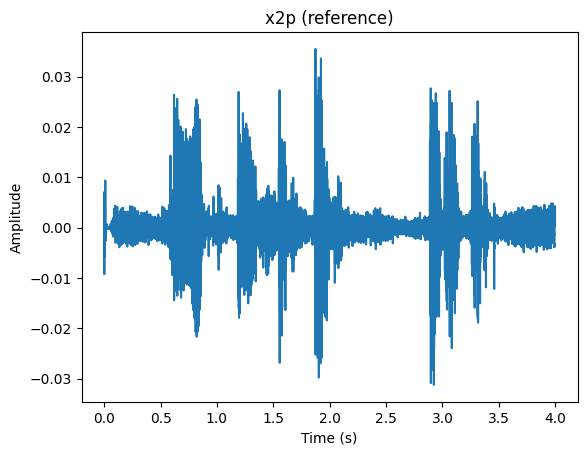

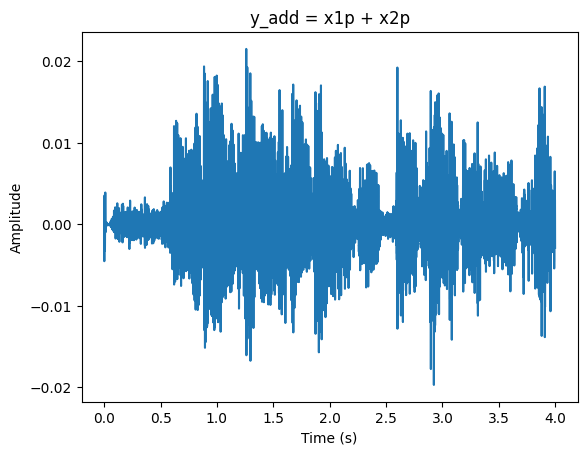

In [50]:
# TODO: Plot + play
plot_waveform(x1p, fs, "x1p (reference)")
plot_waveform(x2p, fs, "x2p (reference)")
plot_waveform(y_add, fs, "y_add = x1p + x2p")
play_audio(y_add, fs)


### Observations (Addition)

- Does the result sound like a mixture?
- Is intelligibility reduced? Why?
- Did you observe clipping? If so, how did you fix it?


## 2.2 Amplitude scaling: a·x

### Tasks
Pick at least 3 scaling factors (e.g., 0.25, 0.5, 2.0).
- Compute `y_scale = a * x1p`
- Listen and compare
- Plot waveforms (zoomed)

> Concept check: Is amplitude scaling the same as “volume change”?  
> Explain perceptually and technically.


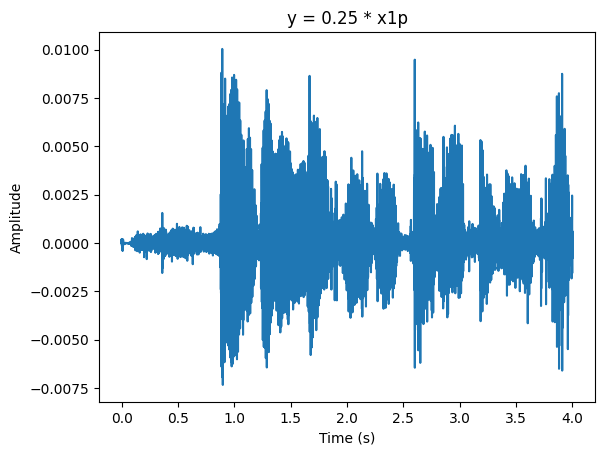

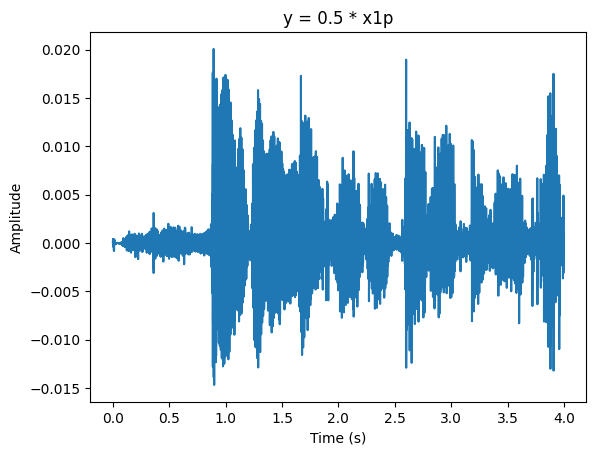

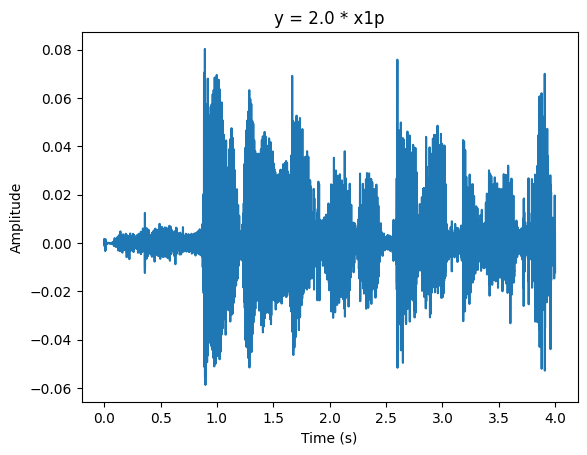

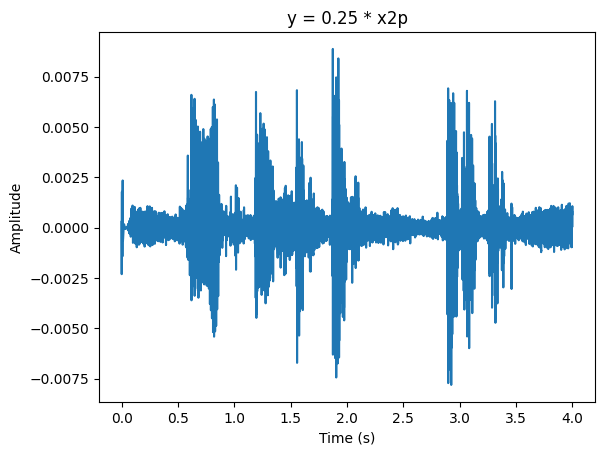

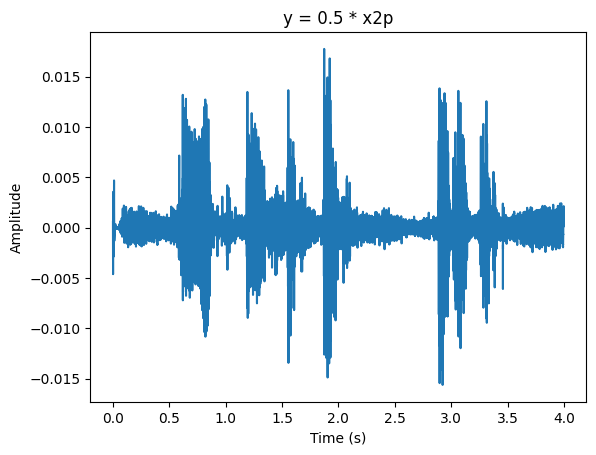

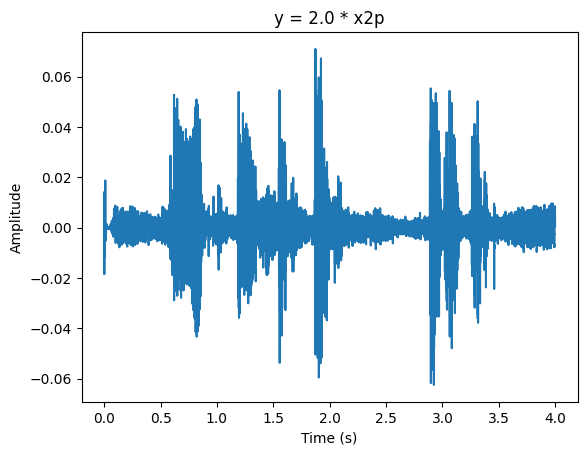

In [52]:
# TODO: Amplitude scaling experiments
scales = [0.25, 0.5, 2.0]
for x_data in [("x1p", x1p), ("x2p", x2p)]:
    for a in scales:
        y = a * x_data[1]
        plot_waveform(y, fs, f"y = {a} * {x_data[0]}")
        play_audio(y, fs)

### Observations (Scaling)

- At what scaling factor do you first observe clipping?
- Is doubling amplitude perceived as “twice as loud”? Why/why not?


## 2.3 Multiplication

### Task A: Speech × sine wave (AM-like effect)
- Generate a sine wave `s(t)` at a chosen frequency (e.g., 50–300 Hz)
- Compute `y_mul = x1p * s`

### Task B: Speech × speech
- Compute `y_ss = x1p * x2p`

For each:
- Plot waveform (zoom)
- Plot spectrum
- Listen and describe

> Hint: Multiplication in time corresponds to convolution in frequency (conceptual link).


In [53]:
# TODO: Create a sine wave with same length as x1p
f0 = 8000
t = np.arange(len(x1p)) / fs
s = np.sin(2*np.pi*f0*t)


In [54]:
# TODO: Multiplication experiments
y_mul = x1p * s
y_ss = x1p * x2p


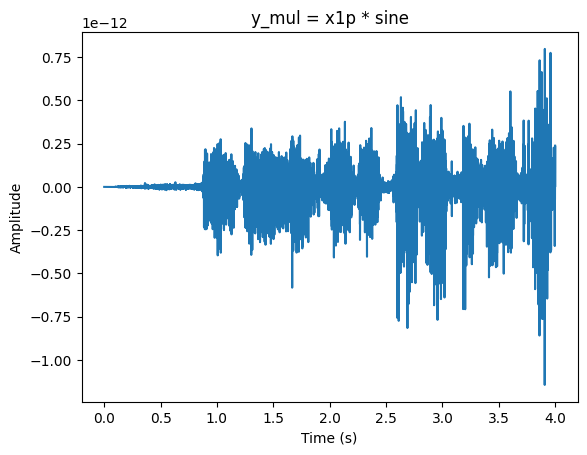

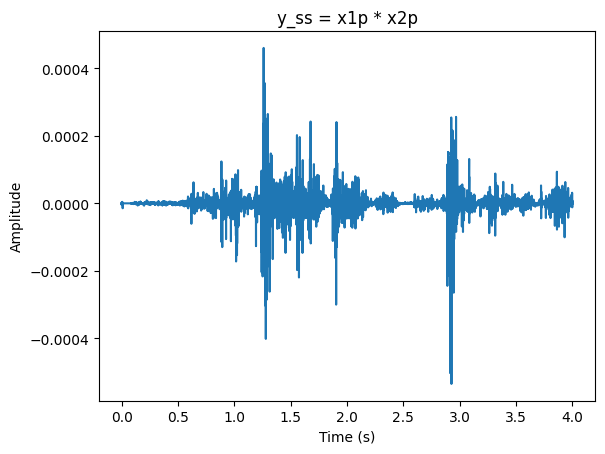

In [59]:
# TODO: Plot + play results
plot_waveform(y_mul, fs, "y_mul = x1p * sine", tlim=(..., ...))
play_audio(y_mul, fs)
plot_waveform(y_ss, fs, "y_ss = x1p * x2p", tlim=(..., ...))
play_audio(y_ss, fs)


### Observations (Multiplication)

- How does `speech × sine` sound compared to original speech?
- What happens to intelligibility in `speech × speech`?
- What changes do you see in the spectrum?


---

# 3. System Properties: Linearity

A system **T{·}** is linear if:
1. Additivity: T(x1 + x2) = T(x1) + T(x2)
2. Homogeneity: T(a·x) = a·T(x)

In this section, you will define **three** systems and test linearity:
- System 1 (linear candidate): e.g., gain + delay, moving average (FIR), convolution with fixed kernel
- System 2 (nonlinear): clipping, squaring, normalization by max
- System 3 (your choice): explain why you chose it


In [88]:
# TODO: Define three systems as Python functions T(x)
# Each should accept x (1D numpy array) and return y (same length preferred)

def T1(x):
    """System 1: gain + delay """
    gain = .5 
    delay_samples = int(0.1 * fs)
    y = np.zeros_like(x)
    y[delay_samples:] = gain * x[:-delay_samples]
    return y


def T2(x):
    """System 2: clipping at +/- 0.5"""
    #clipping 
    non_linear_x = np.clip(x, -0.5, 0.5)
    #squaring
    non_linear_x = non_linear_x**2 
    #normalizing
    non_linear_x = non_linear_x / np.max(np.abs(non_linear_x))
    
    return non_linear_x

def T3(x):
    """System 3 Non Linear: 10-point moving average"""
    """System 3 Linear: reversal"""
    #return np.convolve(x, np.ones(10)/10, mode='same')
    return x[::-1]

## 3.1 Linearity Test Procedure

For each system T:
1. Choose two signals (use `x1p` and `x2p`)
2. Choose a scalar a (e.g., a = 0.7)
3. Compute:
   - Left_add = T(x1 + x2)
   - Right_add = T(x1) + T(x2)
   - Left_hom = T(a·x1)
   - Right_hom = a·T(x1)
4. Measure error:
   - e_add = ||Left_add - Right_add|| / ||Left_add||
   - e_hom = ||Left_hom - Right_hom|| / ||Left_hom||

### Deliverables
- A small table of errors for each system (additivity + homogeneity)
- A brief conclusion: linear / not linear (with evidence)


In [89]:
# TODO: Implement linearity tests and report errors
def rel_error(a, b, eps=1e-12):
    """Relative L2 error ||a-b||/||a||."""
    return np.linalg.norm(a-b)/ (np.linalg.norm(a) + eps)

alpha = 0.7  # you may change


In [90]:
# TODO: Run tests for T1, T2, T3

def computeMeasureError (T, a, b, alpha):
    Left_add = T(a + b)
    Right_add = T(a) + T(b)
    Left_hom = T(alpha * a)
    Right_hom = alpha * T(a)
    e_add = rel_error(Left_add, Right_add)
    e_hom = rel_error(Left_hom, Right_hom)
    return e_add, e_hom

for T in [T1,T2,T3]:
    e_add, e_hom = computeMeasureError(T, x1p, x2p,alpha)
    print(f"System {T.__name__}: e_add = {e_add:.10f}, e_hom = {e_hom:.10f}")

System T1: e_add = 0.0000000000, e_hom = 0.0000000000
System T2: e_add = 0.4783024490, e_hom = 0.2999999225
System T3: e_add = 0.0000000000, e_hom = 0.0000000000


### Conceptual Questions (Linearity)

1. Which of your systems were linear? Which were not?  
2. Why does **clipping** break linearity? Explain using the definition.  
3. Is “normalizing by max amplitude” linear? Why or why not?


**Student Answer:**
1. **Question 1:**
    * T1 and T3 were linear. T2 was not linear as expected. *  
2. **Question 2:**
    * Clipping rounds to the nearest .5 which does so in a non linear fashion. T(x1+x2) = T(x1) + T(x2). When you add a clip at the end it makes the System Non Linear. 
3. **Question 3:** 
    *  Normalizing my Max Amplitude is not linear. It is input dependent and can make a gap between zero and non zero numbers when applied. 

---

# 4. System Properties: Time Invariance

A system **T{·}** is time-invariant if shifting the input shifts the output by the same amount:
- If x₂(t) = x₁(t - t₀), then T{x₂}(t) = T{x₁}(t - t₀)

### Task
For each system (T1, T2, T3):
1. Create a delayed version of x1p by a fixed delay D samples
2. Compare:
   - yA = T(delay(x1p))
   - yB = delay(T(x1p))
3. Measure error and conclude time-invariant or not


In [99]:
# TODO: Implement delay (shift) operator
def delay_signal(x, D):
    """Delay by D samples (zero-pad at start, truncate end)."""
    y = np.zeros_like(x)
    if D < len(x):
        y[D:] = x[:-D]
    return y


In [100]:
# TODO: Time invariance tests for each system
D = int(0.1*fs)  # choose a delay in samples, e.g., int(0.1*fs) for 100 ms
T = [T1, T2, T3]
T_results = []
for T in [T1, T2, T3]:
    yA = T(delay_signal(x1p, D))
    yB = delay_signal(T(x1p), D)
    T_results.append((T , yA, yB))
for sys, yA, yB in T_results:
    error = rel_error(yA, yB)
    print(f"System {sys.__name__}: Time Invariance Error = {error:.10f}")

# Compute relative error and interpret


System T1: Time Invariance Error = 0.0000000000
System T2: Time Invariance Error = 0.0000000000
System T3: Time Invariance Error = 1.4335203171


### Observations & Interpretation (Time Invariance)

- Which systems appear time-invariant?
- If a system is nonlinear, can it still be time-invariant? Explain.
- Does clipping violate time invariance? Under what conditions might it *appear* time-invariant?


**Student Answer:**
1. **Question 1:**
    * The first two seem to be time invariant compared to T3. I would say that because the time invariance error is zero*  
2. **Question 2:**
    * If a system is nonlinear it can be time invariant. This is proven by T2. This is because they are independent properties. Time invariant only means that the tranformation is fixed. 
3. **Question 3:** 
    * Clipping is time invariant.It might appear time invariant if we if we make our delay signal inconsistent. 

---

# 5. Mini-Discussion: “Meaningful” vs “Not Meaningful” Operations

Write 8–12 lines:

- Which operations (addition, scaling, multiplication) are meaningful for audio/speech processing?
- Which ones produce artifacts that are not typical in real acoustic mixing?
- Give at least one real-world example where each meaningful operation occurs.


**Student Answer:**
1. I would say addition and scaling are the most important real world meaningful processing for speech since they deal with superpositioning audio and also scaling since that involves raising the volume of a signal. Mulitplication is not as meaningful because there is a lot of distortion that occurs when multiplying signals.

2. Multiplying produces artifacts that are not typical in real acoustic mixing. There is a lot of distortion and amplitude modulation.

3. So adding sounds together is just superpositioning audio which is useful in natural speech because its like talking over each other. Scaling is like raising the volume of audio. 


---

# 6. Reflection (Mandatory)

Write thoughtful answers (no right/wrong, but must be specific):

1. What did you learn about **signal operations** that you did not expect?  
2. What was one **surprising sound** you created (describe what caused it)?  
3. Which plot (time waveform vs spectrum) was more useful for explaining what you heard—and why?  
4. If you had to teach “linearity” to a friend in 2–3 sentences using one of your systems, what would you say?  
5. What is one experiment you wish you had time to try next?


**Student Answer**
1. I learned alot from signal operations. I learned that somethings are simple arithmatic and others that are nonlinear can mess up the noise. I did not expect that the multiplcation of audio can distort it. 
2. Creating the distorted sound was very interesting. The multiplication caused it. 
3. To me the magnitude plot was the most useful. At first I thought multiplying by a constant factor would mess up the sound but in reality it did not do much except bring up the volume or gain. 
4. I say linearity is important because it helps with modifying audio without changing too much. I would say adding a gain or magnifying the magnitude. The audio is edited in a noticable way but it is basically the same. 
5. I wish I had time for maybe other nonlinear systems. I would like to see how far I can distort my sound to make it sound like something else. 


---

# 7. AI Use Disclosure (Required)

If you used any AI tools (including ChatGPT), briefly describe:
- What you used it for (e.g., debugging, concept clarification)
- What you wrote/changed yourself

**Student Answer:**
I used it to help me understand topics while doing homework. Show me example code and architectural approaches.